<a href="https://colab.research.google.com/github/hariskhan-hk/Churn_pred/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [226]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
tel_df = pd.read_csv('/content/Cleaned_Telecom_Dataset.csv', index_col = 0)
tel_df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


# Feature Scaling

In [228]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [229]:
scaler.fit(tel_df.drop(['Churn'], axis = 1))
scaled_features = scaler.transform(tel_df.drop('Churn',axis = 1))

# Feature Selection

In [230]:
X = tel_df.drop('Churn', axis = 1)
y = tel_df['Churn']

# Train Test Split

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

# With Python Package

In [232]:
model_dt = DecisionTreeClassifier(criterion = "entropy", random_state = 42, max_depth=6, min_samples_leaf=8)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       random_state=42)

In [233]:
y_pred= model_dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [234]:
model_dt.score(X_test,y_test)

0.7706161137440758

In [235]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1549
           1       0.57      0.53      0.55       561

    accuracy                           0.77      2110
   macro avg       0.70      0.70      0.70      2110
weighted avg       0.77      0.77      0.77      2110



In [236]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred)
confusion_matrix_dt

array([[1326,  223],
       [ 261,  300]])

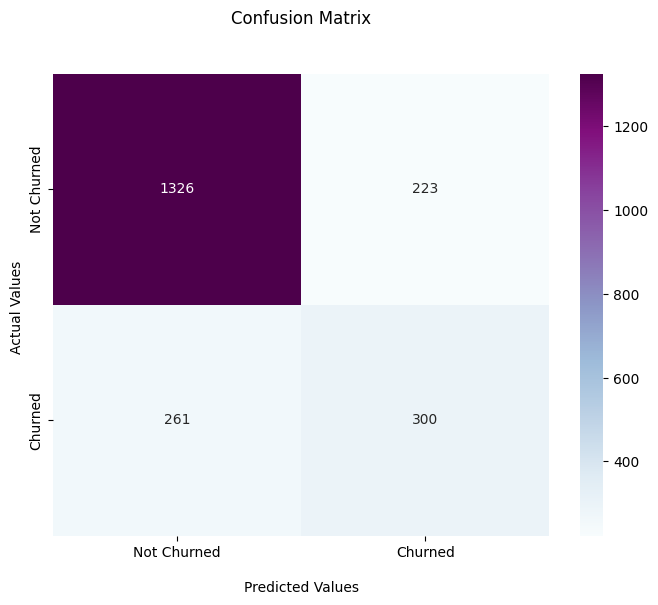

In [237]:
# # create a heatmap of the matrix using matshow()
# import matplotlib.pyplot as plt

# plt.matshow(confusion_matrix_dt)

# # add labels for the x and y axes
# plt.xlabel('Predicted Class')
# plt.ylabel('Actual Class')

# for i in range(2):
#     for j in range(2):
#         plt.text(j, i, confusion_matrix_dt[i, j], ha='center', va='center')


# # Add custom labels for x and y ticks
# plt.xticks([0, 1], ["Not Churned", "Churned"])
# plt.yticks([0, 1], ["Not Churned", "Churned"])
# plt.show()

cm1 = np.array([[1326, 223], [ 261, 300]])
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm1, annot=True, cmap='BuPu', fmt='g')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Churned','Churned'])
ax.yaxis.set_ticklabels(['Not Churned','Churned'])

## Display the visualization of the Confusion Matrix.
plt.show()

As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [238]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [239]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.3)

In [240]:
model_dt_smote=DecisionTreeClassifier(criterion = "entropy",random_state = 42,max_depth=6, min_samples_leaf=8)

In [241]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9161508159819921
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       795
           1       0.93      0.92      0.92       982

    accuracy                           0.92      1777
   macro avg       0.91      0.92      0.92      1777
weighted avg       0.92      0.92      0.92      1777



In [242]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[726  69]
 [ 80 902]]


Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.